## Random Forest Baseline Quickstart for NetML-Competition 2020

### * Loads datasets, plots confusion matrix, prints evaluation metrics on validation set and create submission JSON files

In [1]:
import os
import json
import argparse
import time as t
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from utils.helper import *

In [2]:
# Define function to create submissions
def do_submit(clf, test_set, scaler, class_label_pair, filepath):
    Xtest, ids = get_submission_data(test_set)
    X_test_scaled = scaler.transform(Xtest)
    print("Predicting on {} ...".format(test_set.split('/')[-1]))
    predictions = clf.predict(X_test_scaled)
    make_submission(predictions, ids, class_label_pair, filepath)   

In [3]:
# Modify only this cell:
# Note: anno = "mid" is valid ONLY with non-vpn2016 dataset
###
dataset = "./data/non-vpn2016" # or "./data/CICIDS2017" or "./data/non-vpn2016"  /NetML
anno = "fine" # or "mid" or "fine"
submit = "both" # or "test-std" or "test-challenge"
###

In [4]:
# Assign variables
training_set = dataset+"/2_training_set"
training_anno_file = dataset+"/2_training_annotations/2_training_anno_"+anno+".json.gz"
test_set = dataset+"/1_test-std_set"
challenge_set = dataset+"/0_test-challenge_set"

In [5]:
# Create folder for the results
time_ = t.strftime("%Y%m%d-%H%M%S")

save_dir = os.getcwd() + '/results/' + time_
os.makedirs(save_dir)

In [6]:
# Get training data in np.array format
Xtrain, ytrain, class_label_pair, Xtrain_ids = get_training_data(training_set, training_anno_file)

# Split validation set from training data
X_train, X_val, y_train, y_val = train_test_split(Xtrain, ytrain,
                                                test_size=0.2, 
                                                random_state=42,
                                                stratify=ytrain)


Loading training set ...
Reading 2_training_set.json.gz


In [7]:
from sklearn.feature_selection import VarianceThreshold
# Get name of each class to display in confusion matrix
class_names = list(sorted(class_label_pair.keys()))

# Preprocess the data
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# created problems with ratio and labels
# selector = VarianceThreshold()
# X_train_scaled = selector.fit_transform(X_train_scaled)
# X_val_scaled = selector.fit_transform(X_val_scaled)

In [8]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs = -1, max_features="auto")
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [9]:
# Output accuracy of classifier
print("Training Score: \t{:.5f}".format(clf.score(X_train_scaled, y_train)))
print("Validation Score: \t{:.5f}".format(clf.score(X_val_scaled, y_val)))

Training Score: 	0.35991
Validation Score: 	0.34651


In [10]:
import warnings
warnings.filterwarnings('ignore')

# Compare Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model.stochastic_gradient import SGDClassifier
from sklearn.linear_model.ridge import RidgeClassifierCV
from sklearn.linear_model.ridge import RidgeClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import NearestCentroid
from sklearn.mixture import GaussianMixture


from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import timeit


In [11]:

# # prepare models
models = []

# Didnt work on all datasets
# # models.append(('GB', GradientBoostingClassifier()))
# # models.append(('LRCV', LogisticRegressionCV()))
# # models.append(('CalibC', CalibratedClassifierCV()))

models.append(('LR', LogisticRegression()))
models.append(('SDG', SGDClassifier()))
models.append(('RidgeCV', RidgeClassifierCV()))
models.append(('Ridge', RidgeClassifier()))
models.append(('Perceptron', Perceptron()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('ExtraTreesC', ExtraTreesClassifier()))
models.append(('ExtraTreeC', ExtraTreeClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('Quad', QuadraticDiscriminantAnalysis()))
models.append(('MLP',MLPClassifier(max_iter=30)))
models.append(('NB', GaussianNB()))
models.append(('BernC', BernoulliNB()))
models.append(('NearC', NearestCentroid()))
models.append(('GaussianMixture', GaussianMixture()))

# evaluate each model in turn
results = []
confusion = []
names = []
print("We are good to go...")
 
for name, model in models:
    #timer
    start = timeit.default_timer()
    #name of model we current building
    print("model:"+name)
    #model train
    cv_results = model.fit(X_train_scaled, y_train)
    #the prediction of our model
    y_pred = model.predict(X_val_scaled)
    print("Training Score: \t{:.5f}".format(model.score(X_train_scaled, y_train)))
    print("Validation Score: \t{:.5f}".format(model.score(X_val_scaled, y_val)))
    #add parameters to lists
    confusion.append(y_pred)
    results.append(cv_results)
    names.append(name)
    #print time it took to train
    stop = timeit.default_timer()
    print('Time for model: ', stop - start) 


In [12]:
# Print Confusion Matrix per algorithm
index=1
for i in confusion:
    print("Algo number: "+str(index))
    conf_mat = confusion_matrix(y_true=y_val, y_pred=i)
    print (conf_mat)
    index+=1
    
    #save confusion matrix to file
    # Plot normalized confusion matrix
#     plot_confusion_matrix(directory=save_dir, y_true=y_val, y_pred=i, 
#                             classes=class_names, 
#                             normalize=False)

#for random forest algorithm
# ypred = clf.predict(X_val_scaled)
# np.set_printoptions(precision=2)

# # Plot normalized confusion matrix
# plot_confusion_matrix(directory=save_dir, y_true=y_val, y_pred=ypred, 
#                         classes=class_names, 
#                         normalize=False)

In [13]:
# RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs = -1, max_features="auto")
cv_results = clf.fit(X_train_scaled, y_train)
yPred = clf.predict(X_val_scaled)
print("Training Score: \t{:.5f}".format(clf.score(X_train_scaled, y_train)))
print("Validation Score: \t{:.5f}".format(clf.score(X_val_scaled, y_val)))
conf_mat = confusion_matrix(y_true=y_val, y_pred=yPred)
print (conf_mat)
    
    
# Plot normalized confusion matrix
plot_confusion_matrix(directory=save_dir, y_true=y_val, y_pred=yPred, 
                            classes=class_names, 
                            normalize=False)

Training Score: 	0.35991
Validation Score: 	0.34651
[[   4    0   52    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    0    0    2    0    0    0    0    0    0    0    1
     0    6    1]
 [   0  127  580    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    2  110    8    1    0    0    0    0    0    0    0
     0    2    1]
 [   0    4 6867    1    1    0    0    0   48    1    3    0    0    0
     0    0    0    0    4    9    1    1    0    0    0    0    0    0
     5    1   11]
 [   2    1   47   16    0    0    0    0    3    2    0    0    0    0
     0    0    0    5    0    4    2    0    0    0    0    0    0    0
     0    0    0]
 [   0    1   37    1   15    0    0    0    4    0    1    0    0    0
     0    0    0    1    1    0    0    0    0    0    0    0    0    0
     2    0    4]
 [   0    1   10    0    0   20    0    1    0    0    0    0    0    0
     0    0    0    0    1    0    0    0    0    0    0    0    0

In [14]:
# MLPClassifier
clf = MLPClassifier()
cv_results = clf.fit(X_train_scaled, y_train)
yPred = clf.predict(X_val_scaled)
print("Training Score: \t{:.5f}".format(clf.score(X_train_scaled, y_train)))
print("Validation Score: \t{:.5f}".format(clf.score(X_val_scaled, y_val)))
conf_mat = confusion_matrix(y_true=y_val, y_pred=yPred)
print (conf_mat)
    
    
# # Plot normalized confusion matrix
plot_confusion_matrix(directory=save_dir, y_true=y_val, y_pred=yPred, 
                            classes=class_names, 
                            normalize=False)

Training Score: 	0.34876
Validation Score: 	0.33048
[[   4    0   37    0    0    0    0    0   16    1    0    0    3    1
     0    0    0    1    1    0    0    0    0    0    0    0    0    0
     0    3    0]
 [   0   99  331    0    0    0    0    1  274    0    0    0    0    1
     0    0    0    9  104    5    5    0    0    0    0    0    0    1
     1    1    0]
 [   0    5 4463    1   17    2    0    0 2413    0    2    0    1    1
     0    0    0   18    6    9    0    1    0    0    0    0    0    3
     1    6    8]
 [   2    1   30   18    0    0    0    3   19    1    0    0    0    0
     0    0    0    4    2    0    1    0    0    0    0    0    0    0
     0    1    0]
 [   0    2   29    0   22    0    0    0    3    0    1    0    1    0
     0    0    0    1    1    0    0    0    0    0    0    1    0    1
     1    2    2]
 [   0    0    7    0    0   27    1    1    5    0    0    0    0    0
     0    0    0    0    1    2    0    0    0    0    0    0    0

F1: 			0.34799
mAP: 			0.26782
Confusion matrix is saved as ./results/20210428-175831/CM.png



(<matplotlib.axes._subplots.AxesSubplot at 0x2a9ebcd7588>,
 array([[   6,    0,   18,    0,    0,    0,    0,    0,   13,    2,    1,
            1,    1,    0,    0,    0,    0,   12,    1,    8,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    4,    0],
        [   2,  553,   75,    0,    0,    0,    0,    0,   84,    0,    0,
            0,    0,    0,    0,    0,    0,   37,   20,   56,    1,    0,
            0,    0,    0,    0,    0,    0,    0,    4,    0],
        [   5,   97, 2664,    3,   13,    1,    0,    0, 2023,   10,    3,
            8,    0,    0,    0,    1,    1,  718,   81, 1286,    0,    1,
            0,    0,    0,    0,    0,    0,    2,   34,    6],
        [   3,    2,   12,   20,    0,    0,    0,    4,   11,    4,    0,
            1,    0,    0,    0,    0,    0,    9,    4,    9,    1,    0,
            0,    0,    0,    0,    0,    0,    0,    2,    0],
        [   0,    0,   19,    1,   35,    0,    0,    1,    3,    0,    2,
          

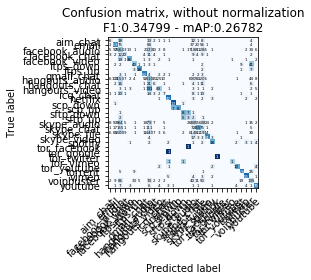

In [18]:
#ExtraTreesClassifier
clf = ExtraTreesClassifier()
cv_results = clf.fit(X_train_scaled, y_train)
yPred = clf.predict(X_val_scaled)
print("Training Score: \t{:.5f}".format(clf.score(X_train_scaled, y_train)))
print("Validation Score: \t{:.5f}".format(clf.score(X_val_scaled, y_val)))
conf_mat = confusion_matrix(y_true=y_val, y_pred=yPred)
print (conf_mat)
    
    
# Plot normalized confusion matrix
plot_confusion_matrix(directory=save_dir, y_true=y_val, y_pred=yPred, 
                            classes=class_names, 
                            normalize=False)

In [16]:
# Make submission with JSON format
if submit == "test-std" or submit == "both":
    do_submit(clf, test_set, scaler, class_label_pair, save_dir+"/submission_test-std.json")
if submit == "test-challenge" or submit == "both":
    do_submit(clf, challenge_set, scaler, class_label_pair, save_dir+"/submission_test-challenge.json")


Loading submission set ...
Reading 1_test-std_set.json.gz
Predicting on 1_test-std_set ...
Submission file is created as ./results/20210428-175831/submission_test-std.json

Loading submission set ...
Reading 0_test-challenge_set.json.gz
Predicting on 0_test-challenge_set ...
Submission file is created as ./results/20210428-175831/submission_test-challenge.json

